# Imports 

In [13]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

# Preprocessing 


In [5]:
folder_path = r"C:\Users\Liberty\Desktop\CodingProjects\deep learning - sprint 3\UTKFace"

output_base_path = r"C:\Users\Liberty\Desktop\CodingProjects\deep learning - sprint 3\UTKFace_Splits"
train_dir = os.path.join(output_base_path, "Train")
val_dir = os.path.join(output_base_path, "Validation")
test_dir = os.path.join(output_base_path, "Test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

data = []
pattern = re.compile(r"(\d+)_(\d)_(\d)_.+\.jpg")

for filename in os.listdir(folder_path):
    match = pattern.match(filename)
    if match:
        age, gender, race = map(int, match.groups())
        filepath = os.path.join(folder_path, filename)
        if race == 4 and age > 60:
            age_group = "60-120"
        else:
            if age <= 2:
                age_group = "(0, 2]"
            elif age <= 10:
                age_group = "(3, 10]"
            elif age <= 20:
                age_group = "(11, 20]"
            elif age <= 30:
                age_group = "(21, 30]"
            elif age <= 40:
                age_group = "(31, 40]"
            elif age <= 50:
                age_group = "(41, 50]"
            elif age <= 60:
                age_group = "(51, 60]"
            elif age <= 70:
                age_group = "(60-70]"
            elif age <= 80:
                age_group = "(70-80]"
            else:
                age_group = "(80-120]"
        data.append([filepath, age, gender, race, age_group])

columns = ["filepath", "age", "gender", "race", "age_group"]
df = pd.DataFrame(data, columns=columns)

X = df["filepath"]
y = df[["gender", "race", "age_group"]]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
df.loc[df["filepath"].isin(X_train), "split"] = "Train"
df.loc[df["filepath"].isin(X_val), "split"] = "Validation"
df.loc[df["filepath"].isin(X_test), "split"] = "Test"

for _, row in df.iterrows():
    filepath = row["filepath"]
    split = row["split"]

    if split == "Train":
        dest_dir = train_dir
    elif split == "Validation":
        dest_dir = val_dir
    elif split == "Test":
        dest_dir = test_dir
    else:
        continue

    shutil.copy(filepath, dest_dir)

print("Images have been successfully split and copied to Train, Validation, and Test directories.")

Images have been successfully split and copied to Train, Validation, and Test directories.


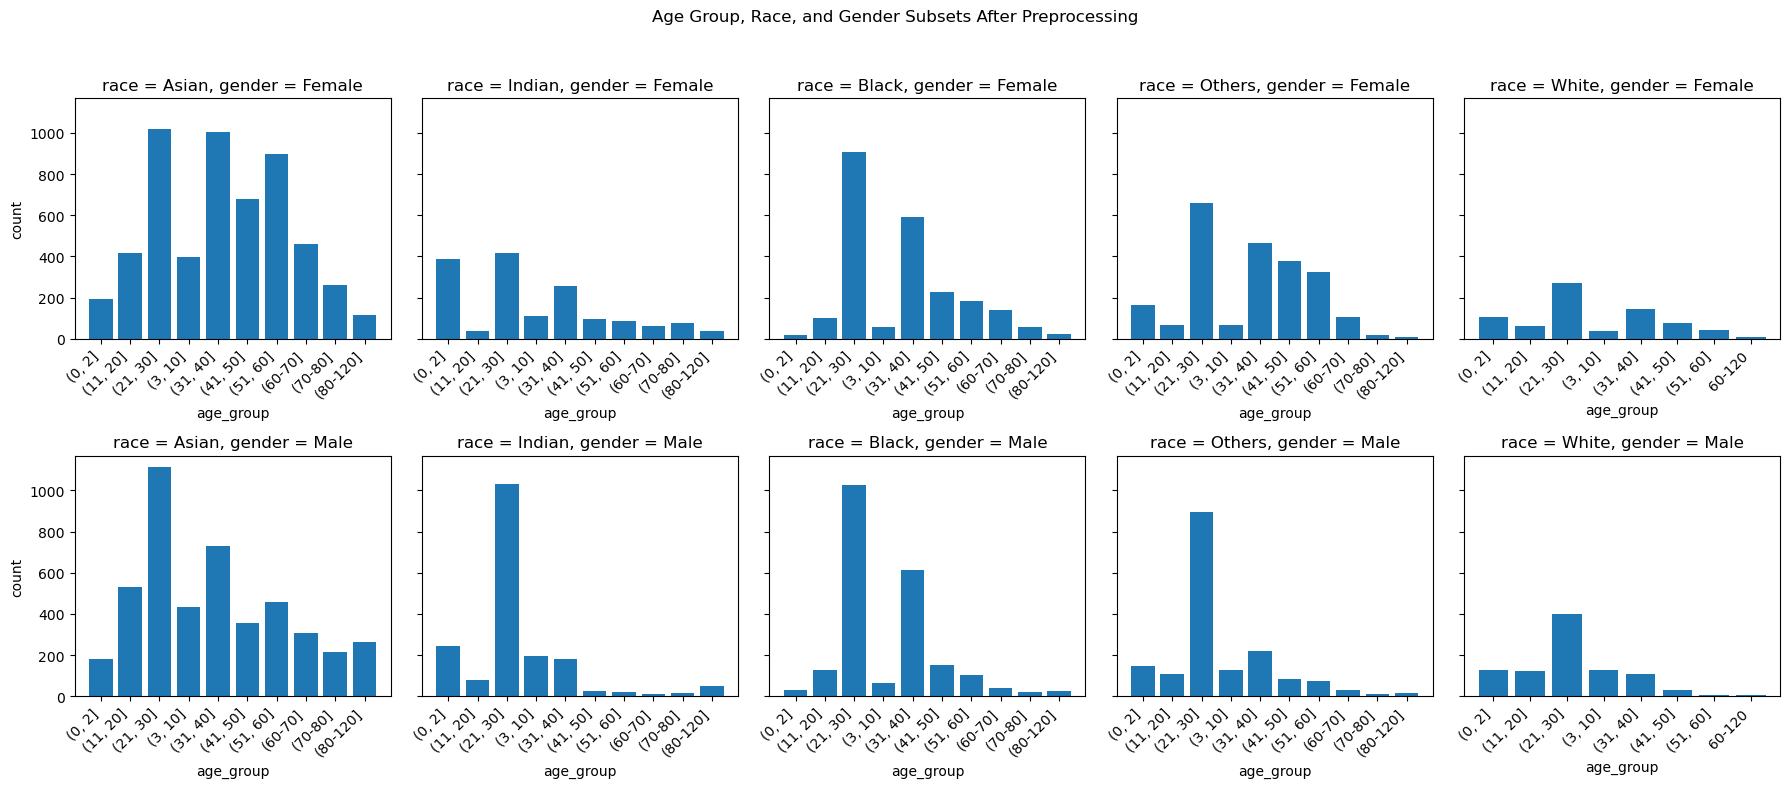

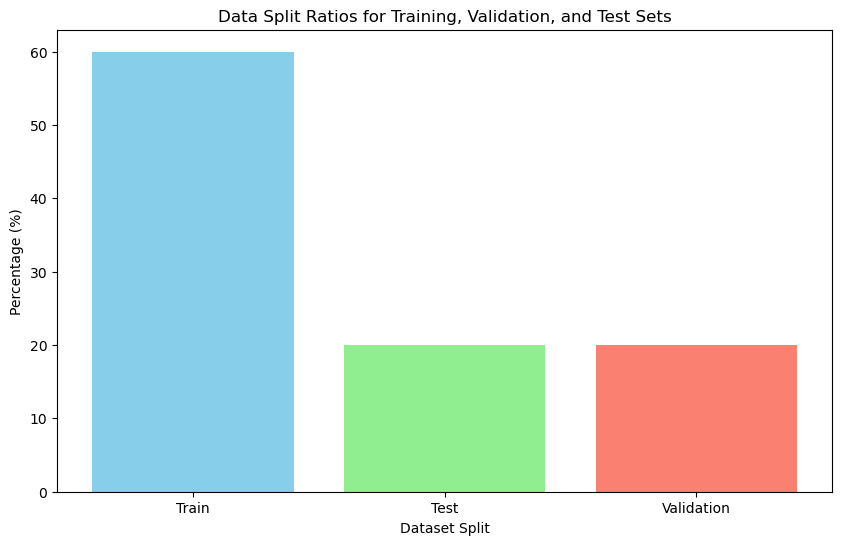

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(18, 8), sharey=True)
fig.suptitle("Age Group, Race, and Gender Subsets After Preprocessing")

for i, race in enumerate(df["race"].unique()):
    for j, gender in enumerate(df["gender"].unique()):
        subset = df[(df["race"] == race) & (df["gender"] == gender)]
        age_group_counts = subset["age_group"].value_counts().sort_index()
        
        ax = axes[j, i]
        ax.bar(age_group_counts.index, age_group_counts.values)
        ax.set_title(f'race = {["Asian", "Black", "Indian", "Others", "White"][race]}, gender = {["Female", "Male"][gender]}')
        ax.set_xticklabels(age_group_counts.index, rotation=45, ha='right')
        ax.set_xlabel('age_group')
        if i == 0:
            ax.set_ylabel('count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

split_counts = df["split"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(split_counts.index, split_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Data Split Ratios for Training, Validation, and Test Sets')
plt.xlabel('Dataset Split')
plt.ylabel('Percentage (%)')
plt.show()

## Procedure and Resulting Dataset

> Steps

1. **Splitting**:
   - The dataset was initially stored in a single folder containing all images. Each image filename contained information about age, gender, and race.
   - The filenames were parsed using a regular expression ((\d+)_(\d)_(\d)_.+\.jpg) to extract age, gender, and race information.
   - After parsing, the images were grouped into age categories based on the extracted age. 
   - After extracting all required data (filepath, age, gender, race, and age group), the data was split into three subsets: **training**, **validation**, and **test**.

2. **Data Split Ratios**:
   - The dataset was split using a stratified approach to ensure that each set had a balanced distribution of the age_group and gender attributes. Specifically:
     - **60%** of the data was assigned to the **training** set.
     - The remaining **40%** was split evenly between **validation** and **test** sets, each containing **20%** of the data.

3. **Copying Images to Split Folders**:
   - Once the splits were determined, the images were copied into respective directories (Train, Validation, and Test).
   - This ensured that each data split had its own folder structure for easy access during training and evaluation.

> Resulting Dataset

- The distribution highlights an imbalance in some combinations, especially among certain age groups (e.g., age groups above 60 years) and races, such as **Indian** and **Others** categories.
- The dataset exhibits an **unequal distribution** among certain demographic groups, especially for the older age groups and certain racial categories. This kind of imbalance may lead to biased predictions if the model overfits to the more prevalent categories.